In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def plot_confusion_matrix(y_true, y_pred):
    """Function to plot confusion matrix."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6,5))
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_prob):
    """Function to plot ROC curve."""
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], color='gray', linestyle='--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Call the functions using model predictions
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_prob)



NameError: name 'y_pred' is not defined

Accuracy: 0.5000

Confusion Matrix:
 [[45 54]
 [46 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.45      0.47        99
           1       0.50      0.54      0.52       101

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200


ROC-AUC Score: 0.5260


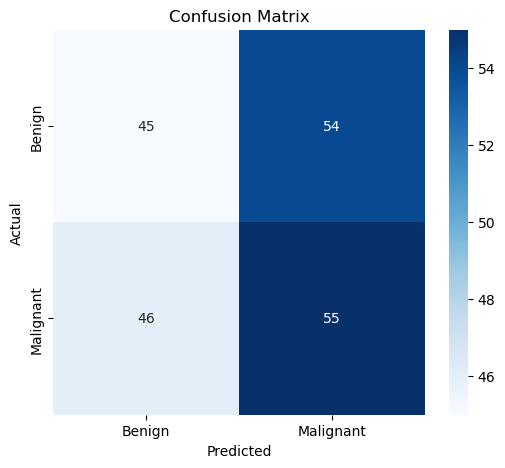

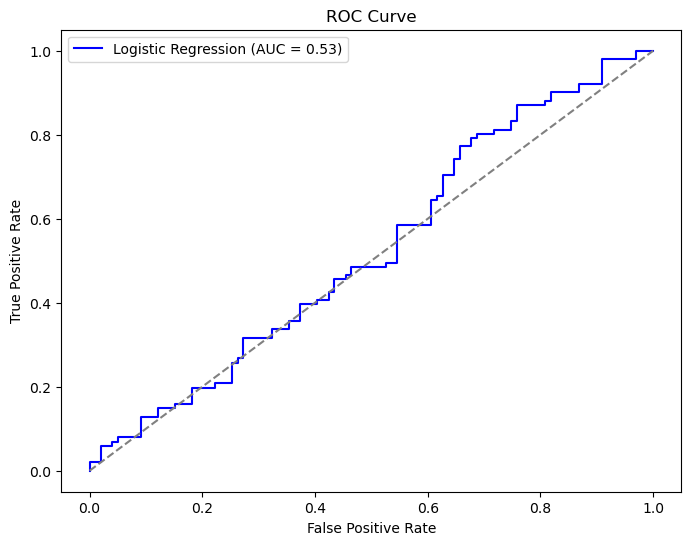

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


file_path = r'C:\Users\KIIT\OneDrive\Desktop\lung_cancer_labeled_dataset_numerical.csv'
df = pd.read_csv(file_path)


df.drop(columns=['Patient_ID'], inplace=True)


X = df.drop(columns=['Label', 'Survival_Months'])  
y = df['Label']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

def plot_confusion_matrix(y_true, y_pred):
    """Plot the confusion matrix."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


def plot_roc_curve(y_true, y_prob):
    """Plot the ROC curve."""
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], color='gray', linestyle='--')  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_prob)
